In [1]:
library("factoextra")
options(repr.plot.width=12, repr.plot.height=13)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [2]:
path="C:/Users/Jordi/New_Jupyter/"
setwd(path)
mydata = read.csv("threads_ideal_data_partial_sp_cl+listR.csv", sep=";")
unique(mydata[,"comp_opt"])

[1] O2
Levels: O2

In [3]:
colnames(mydata)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "time_x"       "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN" 
[16] "PAPI_BR_MSP"  "time_y"       "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM" 
[21] "time_x.1"     "PAPI_SP_OPS"  "PAPI_LD_INS"  "PAPI_L2_STM"  "time_y.1"    
[26] "PAPI_TLB_DM"  "PAPI_L2_DCH"  "time"         "time_log"     "P_index"     
[31] "ideal"        "affinity"     "T_list"       "P_list"

In [4]:
library(stringr)
colnames(mydata)<-gsub(x = names(mydata), pattern = "\\.", replacement = "_" )

In [5]:
#colnames(mydata)

In [6]:
mydata = mydata[mydata$threads == 6,]
unique(mydata$threads)
mydata_no_time <- subset(mydata, select = -c(P_list))
mydata_no_time <- subset(mydata_no_time, select = -c(T_list))
mydata_no_time <- subset(mydata_no_time, select = -c(ideal))
mydata_no_time <- subset(mydata_no_time, select = -c(P_index))
mydata_no_time <- subset(mydata_no_time, select = -c(time_log))
mydata_no_time <- subset(mydata_no_time, select = -c(time))
mydata_no_time <- subset(mydata_no_time, select = -c(time_y_1))
mydata_no_time <- subset(mydata_no_time, select = -c(time_x_1))
mydata_no_time <- subset(mydata_no_time, select = -c(time_x))
mydata_no_time <- subset(mydata_no_time, select = -c(time_y))
mydata_no_time <- subset(mydata_no_time, select = -c(affinity))




mydata_no_time <- subset(mydata_no_time, select = -c(PAPI_SP_OPS))



[1] 6

In [7]:
colnames(mydata_no_time)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [8]:
#mydata = mydata[mydata$comp_opt != 'NF',]
#mydata = mydata[mydata$comp_opt != 'O1',]
#mydata = mydata[mydata$label != '2D4PStencil_E',]
#mydata = mydata[mydata$label != 'Reduction_E',]
#mydata = mydata[mydata$label != '2PStencil_E',]

#head(mydata)
#unique(mydata[,"comp_opt"])

In [9]:
#head(mydata)

In [10]:
dfu <- unique(mydata_no_time$size_vector)
#dfu[order(dfu)]

comprss <- function(tx) { 
      div <- findInterval(as.numeric(gsub("\\,", "", tx)), 
                          c(1, 1e3, 1e6, 1e9, 1e12) )
      paste(round( as.numeric(gsub("\\,","",tx))/10^(3*(div-1)), 2), 
           c("","K","M","B","T")[div] )}
comprss(dfu[order(dfu)])



[1] "1 K"   "2 K"   "3 K"   "4 K"   "5 K"   "6 K"   "7 K"   "8 K"   "9 K"  
[10] "10 K"  "20 K"  "30 K"  "40 K"  "50 K"  "60 K"  "70 K"  "80 K"  "90 K" 
[19] "100 K" "200 K" "300 K" "400 K" "500 K" "600 K" "700 K" "800 K" "900 K"
[28] "1 M"   "2 M"   "3 M"   "5 M"   "7 M"   "9 M"   "20 M"  "40 M"  "60 M" 
[37] "80 M"  "100 M" "120 M" "140 M" "160 M" "180 M" "200 M"

In [11]:
#print(new_mydata[,c("PAPI_VEC_SP","PAPI_VEC_DP")])
#print(mydata[,c("PAPI_VEC_SP","PAPI_SP_OPS")])

In [12]:
#div = mydata$PAPI_SP_OPS/mydata$PAPI_VEC_SP
#div <- na.omit(div)
#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN + mydata$PAPI_BR_UCN)

In [13]:
#mean(div)
#quantile(div,0.25)
#quantile(div,0.5)
#quantile(div,0.75)
#boxplot(div)

In [14]:
#print(mydata[,c("PAPI_BR_INS","PAPI_BR_CN","PAPI_BR_UCN")])#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN/mydata$PAPI_BR_UCN)
#print(subs)
#perc = subs/mydata$PAPI_BR_INS

#head(percent(perc[order(perc,decreasing = TRUE)]))

In [15]:
#all(new_mydata$PAPI_VEC_SP == new_mydata$PAPI_VEC_DP)
all(mydata_no_time$PAPI_DP_SP == mydata_no_time$PAPI_SP_OPS)

[1] TRUE

In [16]:
colnames(mydata_no_time)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [17]:
colnames(mydata_no_time[6:ncol(mydata_no_time)])

[1] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
 [6] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[11] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[16] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [18]:
new_mydata = mydata_no_time[,6:ncol(mydata_no_time)]
dim(new_mydata)


[1] 129000     17

In [19]:
new_mydata

,PAPI_L1_DCM,PAPI_L3_TCM,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L2_LDM,PAPI_SR_INS,PAPI_BR_UCN,PAPI_BR_CN,PAPI_BR_TKN,PAPI_BR_MSP,PAPI_FP_OPS,PAPI_L1_LDM,PAPI_L1_STM,PAPI_LD_INS,PAPI_L2_STM,PAPI_TLB_DM,PAPI_L2_DCH
18001,24787,331,1184348,1842480,8892,109369,8369,270850,194265,1875,100,13747,9626,219367,7176,538,7911
18002,23301,4,1638695,2612988,6373,108056,8112,414901,265960,1367,27,10928,6962,324822,4457,107,6370
18003,23348,1,1740141,2730114,3537,108051,8091,422341,269682,1389,27,12173,9776,283230,4634,79,16548
18004,23252,2,1725934,2704176,3702,108051,8063,423413,270304,1361,28,12191,9789,286503,2806,79,14975
18005,23213,0,1710811,2647944,2924,108051,8082,421301,269190,1347,27,12270,9829,288146,3094,78,16953
18006,23207,0,1711578,2673864,3756,108051,8097,420796,269046,1339,27,12198,9761,286095,2336,84,15820
18007,23328,0,1776328,2795634,3625,108057,8088,432512,274781,1390,27,12199,9782,284457,2836,74,16849
18008,23247,1,1704241,2644182,3071,108051,8079,419148,268087,1360,27,12149,9775,282177,2282,72,16238
18009,23194,0,1709832,2667276,3554,108051,8085,419984,268572,1352,27,12257,9788,283904,2840,79,16940
18010,23214,0,1716988,2658564,2889,108051,8078,443871,280466,1427,27,12361,9811,288240,2405,80,15797


In [20]:
colnames(mydata_no_time)
log.ir <-scale(new_mydata, center = TRUE, scale = TRUE)
res.label <- mydata_no_time[,4]
res.pca <- prcomp(log.ir, center = TRUE, scale. = TRUE)



[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [21]:
print(res.pca)

Standard deviations (1, .., p=17):
 [1] 3.379701188 1.504922723 0.956770748 0.768538835 0.719465189 0.680361735
 [7] 0.571399786 0.451287398 0.352472776 0.286815259 0.227667171 0.146822581
[13] 0.117818249 0.041411547 0.022970588 0.007844943 0.003237912

Rotation (n x k) = (17 x 17):
                   PC1         PC2          PC3          PC4         PC5
PAPI_L1_DCM  0.2755985  0.17070672 -0.208816025  0.040230143 -0.04888999
PAPI_L3_TCM  0.2566979  0.18924101 -0.067037650  0.088785572 -0.14997778
PAPI_TOT_INS 0.2602277 -0.29648628 -0.009739886  0.058000645  0.12835106
PAPI_REF_CYC 0.2707468  0.15642009 -0.102569913  0.010502834 -0.13782742
PAPI_L2_LDM  0.2470323  0.23336041 -0.081855376  0.217723021 -0.03641855
PAPI_SR_INS  0.2710042 -0.18945919  0.082036873  0.027145393  0.19390521
PAPI_BR_UCN  0.1980851 -0.01962005  0.060125328 -0.920996331 -0.09630578
PAPI_BR_CN   0.2705941 -0.19373799  0.128566212 -0.006662824  0.23110830
PAPI_BR_TKN  0.2704957 -0.19381083  0.129070347 -0.0049273

In [22]:
names(res.pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [23]:
print(res.pca$sdev)

 [1] 3.379701188 1.504922723 0.956770748 0.768538835 0.719465189 0.680361735
 [7] 0.571399786 0.451287398 0.352472776 0.286815259 0.227667171 0.146822581
[13] 0.117818249 0.041411547 0.022970588 0.007844943 0.003237912


In [24]:
head(unclass(res.pca$rotation)[])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
PAPI_L1_DCM,0.2755985,0.1707067,-0.208816025,0.04023014,-0.04888999,-0.071585763,0.09461292,0.07095373,0.14423276,-0.12589407,-3.787179e-05,0.64268072,-0.61158663,0.06591853,0.008992751,0.0042412644,-0.0028406685
PAPI_L3_TCM,0.2566979,0.1892410,-0.067037650,0.08878557,-0.14997778,0.088204483,-0.53785826,0.12061164,-0.56868179,-0.09999781,-1.948562e-02,0.31372808,0.34544054,-0.00141624,-0.016408174,0.0005901065,-0.0008889652
PAPI_TOT_INS,0.2602277,-0.2964863,-0.009739886,0.05800064,0.12835106,0.016898352,-0.04040050,-0.13167790,0.09821967,0.33852282,-8.479020e-02,0.09933933,0.15000780,0.79482228,-0.098014734,-0.0009192259,-0.0057156234
PAPI_REF_CYC,0.2707468,0.1564201,-0.102569913,0.01050283,-0.13782742,0.187454469,-0.40198609,0.17615324,0.06219483,-0.08052770,1.776985e-02,-0.62494003,-0.45710015,0.18520705,-0.019188149,-0.0029254305,-0.0014189495
PAPI_L2_LDM,0.2470323,0.2333604,-0.081855376,0.21772302,-0.03641855,-0.544938108,0.11726053,-0.08696152,-0.02242855,0.06533911,-3.876661e-03,-0.17038316,0.10799289,0.02448506,0.405202849,0.5478682295,0.0197372552
PAPI_SR_INS,0.2710042,-0.1894592,0.082036873,0.02714539,0.19390521,0.003465217,0.08110637,0.26821227,-0.03794592,0.05181553,-8.378786e-01,-0.04799768,-0.02532982,-0.24048573,-0.010518900,-0.0035656690,0.0005498772


In [25]:
# Eigenvalues
eig <- (res.pca$sdev)^2
print(eig)

 [1] 1.142238e+01 2.264792e+00 9.154103e-01 5.906519e-01 5.176302e-01
 [6] 4.628921e-01 3.264977e-01 2.036603e-01 1.242371e-01 8.226299e-02
[11] 5.183234e-02 2.155687e-02 1.388114e-02 1.714916e-03 5.276479e-04
[16] 6.154313e-05 1.048407e-05


In [26]:
# Variances in percentage
variance <- eig*100/sum(eig)
print(variance)

 [1] 6.719047e+01 1.332231e+01 5.384766e+00 3.474423e+00 3.044883e+00
 [6] 2.722895e+00 1.920575e+00 1.198002e+00 7.308062e-01 4.839000e-01
[11] 3.048961e-01 1.268051e-01 8.165376e-02 1.008774e-02 3.103811e-03
[16] 3.620184e-04 6.167101e-05


In [27]:
# Cumulative variances
cumvar <- cumsum(variance)
print(cumvar)

 [1]  67.19047  80.51278  85.89755  89.37197  92.41685  95.13975  97.06032
 [8]  98.25832  98.98913  99.47303  99.77793  99.90473  99.98638  99.99647
[15]  99.99958  99.99994 100.00000


In [28]:
eig.decathlon2.active <- data.frame(eig = eig, variance = variance,cumvariance = cumvar)
print(eig.decathlon2.active)

            eig     variance cumvariance
1  1.142238e+01 6.719047e+01    67.19047
2  2.264792e+00 1.332231e+01    80.51278
3  9.154103e-01 5.384766e+00    85.89755
4  5.906519e-01 3.474423e+00    89.37197
5  5.176302e-01 3.044883e+00    92.41685
6  4.628921e-01 2.722895e+00    95.13975
7  3.264977e-01 1.920575e+00    97.06032
8  2.036603e-01 1.198002e+00    98.25832
9  1.242371e-01 7.308062e-01    98.98913
10 8.226299e-02 4.839000e-01    99.47303
11 5.183234e-02 3.048961e-01    99.77793
12 2.155687e-02 1.268051e-01    99.90473
13 1.388114e-02 8.165376e-02    99.98638
14 1.714916e-03 1.008774e-02    99.99647
15 5.276479e-04 3.103811e-03    99.99958
16 6.154313e-05 3.620184e-04    99.99994
17 1.048407e-05 6.167101e-05   100.00000


In [29]:
summary(res.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.3797 1.5049 0.95677 0.76854 0.71947 0.68036 0.57140
Proportion of Variance 0.6719 0.1332 0.05385 0.03474 0.03045 0.02723 0.01921
Cumulative Proportion  0.6719 0.8051 0.85898 0.89372 0.92417 0.95140 0.97060
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.45129 0.35247 0.28682 0.22767 0.14682 0.11782 0.04141
Proportion of Variance 0.01198 0.00731 0.00484 0.00305 0.00127 0.00082 0.00010
Cumulative Proportion  0.98258 0.98989 0.99473 0.99778 0.99905 0.99986 0.99996
                          PC15     PC16     PC17
Standard deviation     0.02297 0.007845 0.003238
Proportion of Variance 0.00003 0.000000 0.000000
Cumulative Proportion  1.00000 1.000000 1.000000

In [30]:
library("factoextra")
eig.val <- get_eigenvalue(res.pca)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,11.4223801,67.190471,67.19047
Dim.2,2.2647924,13.322308,80.51278
Dim.3,0.9154103,5.384766,85.89755
Dim.4,0.5906519,3.474423,89.37197
Dim.5,0.5176302,3.044883,92.41685
Dim.6,0.4628921,2.722895,95.13975


In [31]:
options(repr.plot.width = 20, repr.plot.height = 10)

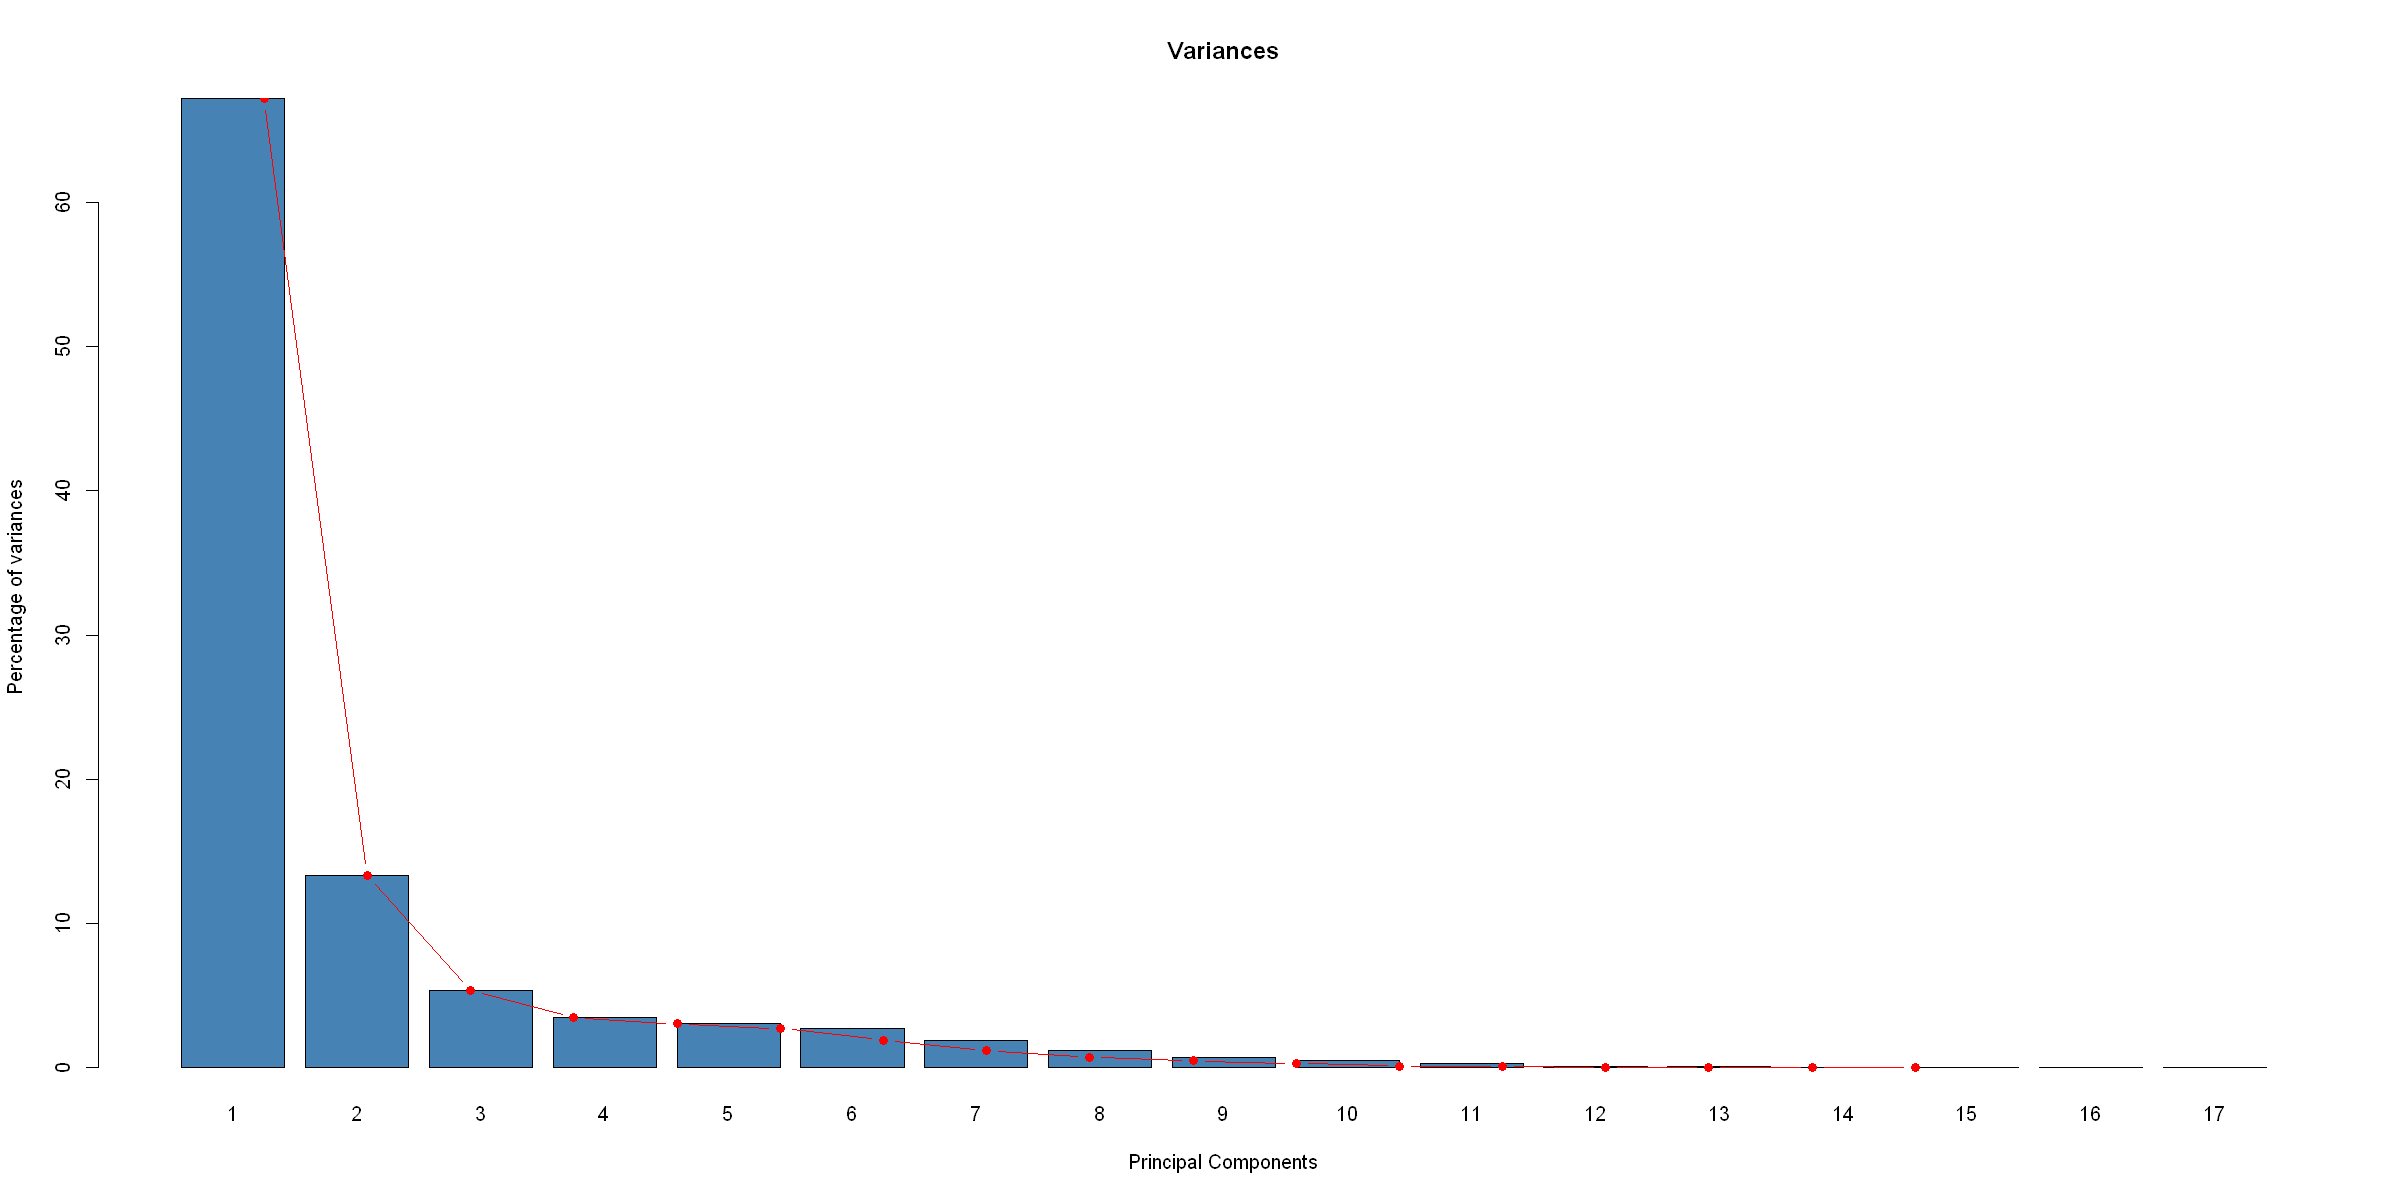

In [32]:
barplot(eig.decathlon2.active[, 2], names.arg=1:nrow(eig.decathlon2.active), 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "Percentage of variances",
       col ="steelblue")
# Add connected line segments to the plot
lines(x = 1:nrow(eig.decathlon2.active), 
      eig.decathlon2.active[, 2], 
      type="b", pch=19, col = "red")

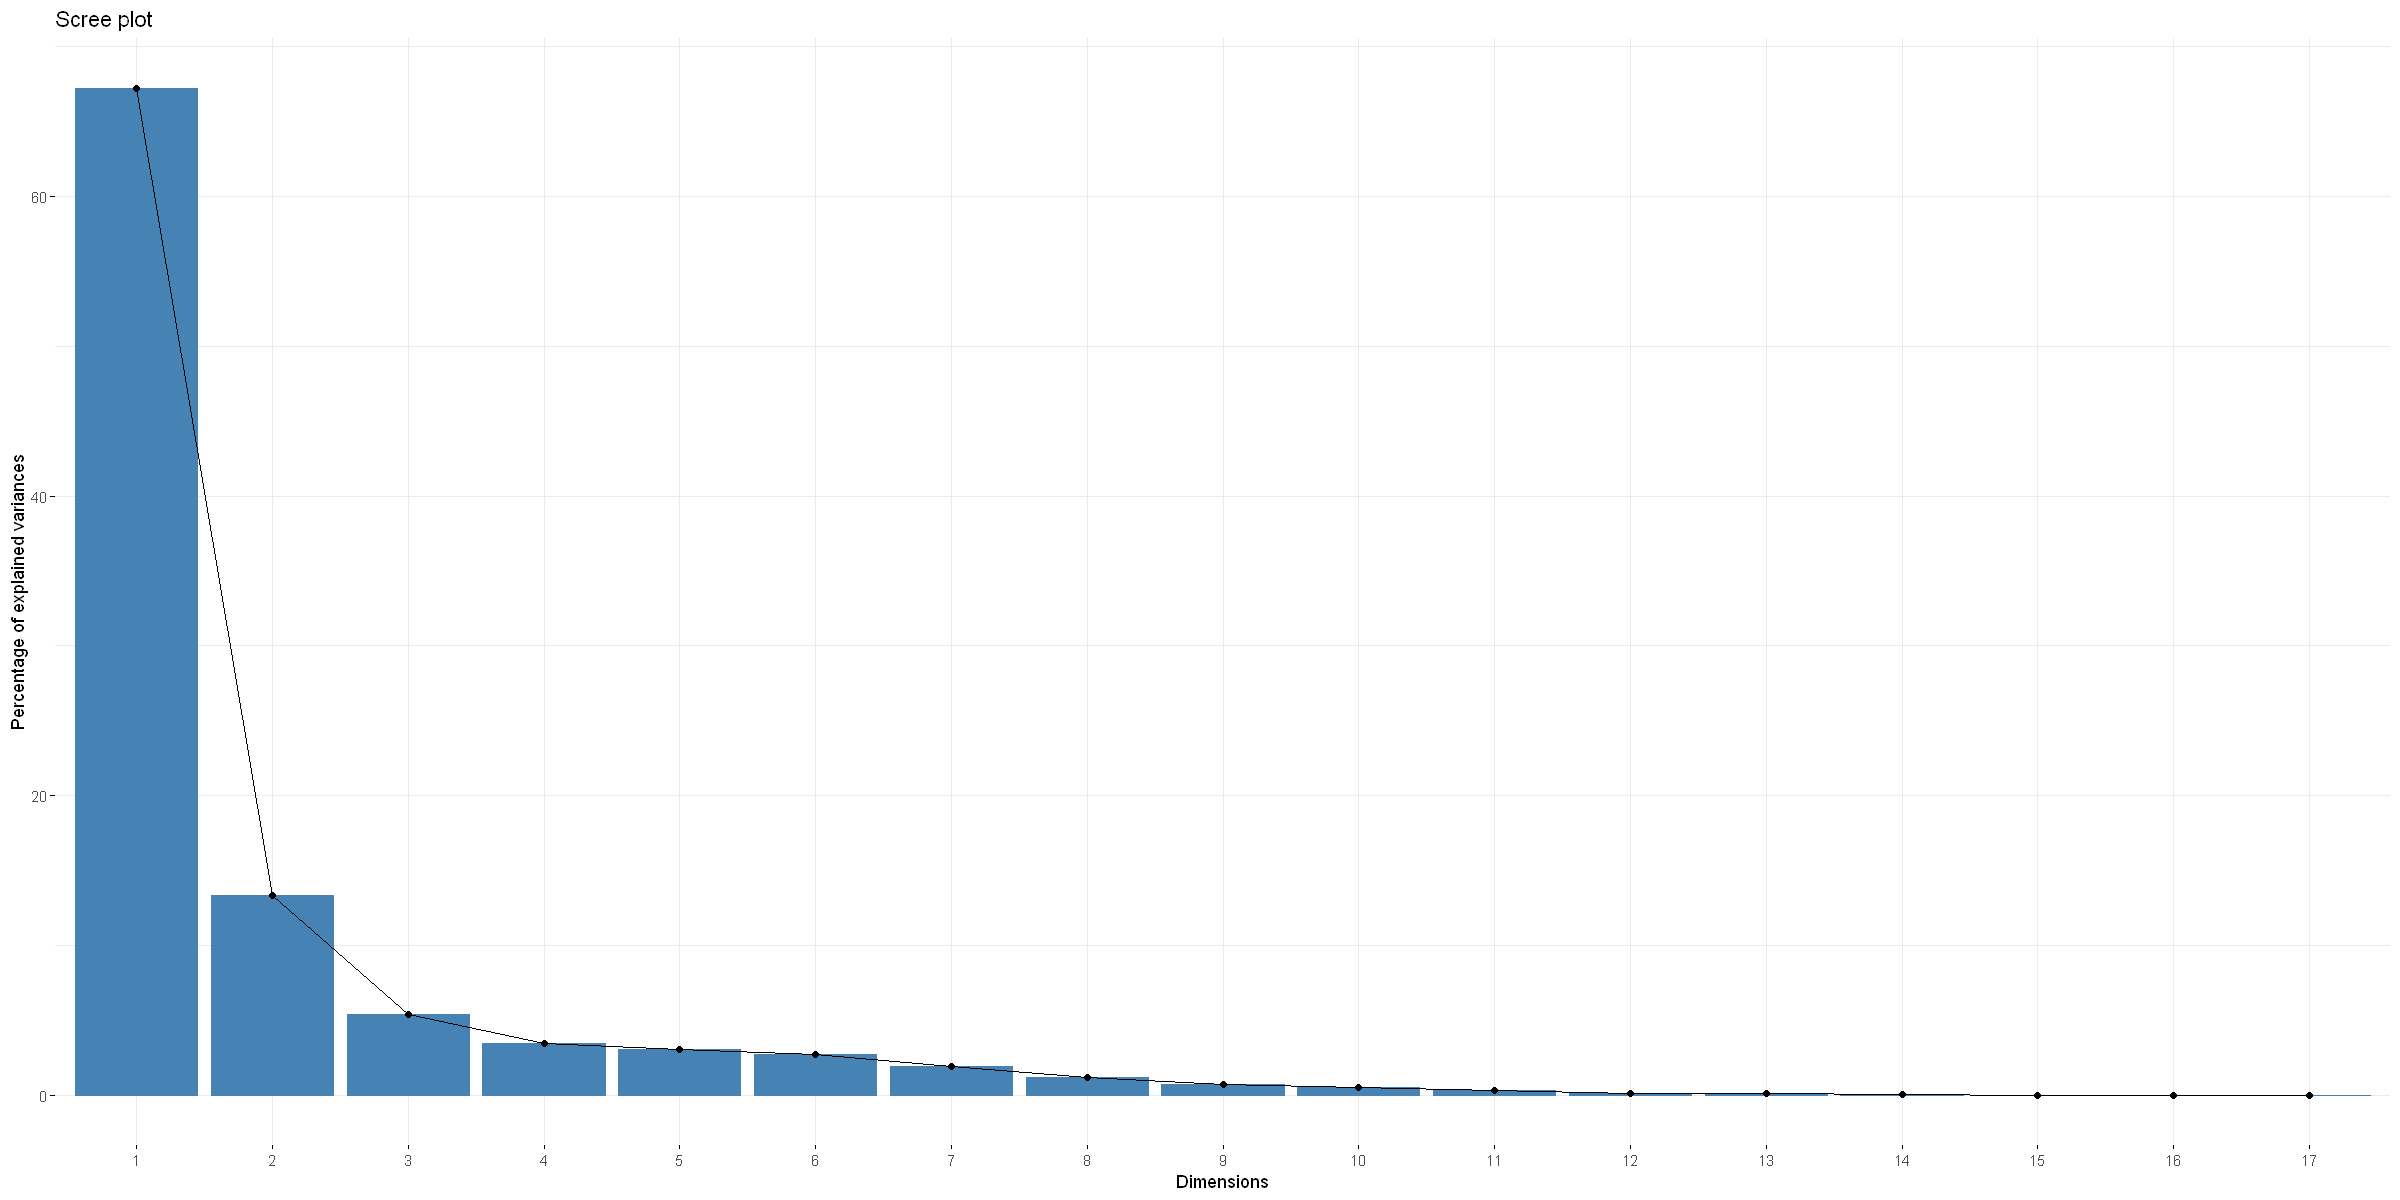

In [33]:
fviz_screeplot(res.pca, ncp=54)

In [34]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [35]:
var$coord


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17
PAPI_L1_DCM,0.9314405,0.25690043,-0.199789064,0.030918428,-0.03517465,-0.0487042140,0.05406180,0.03202053,0.050838121,-0.036108339,-8.622163e-06,0.0943600420,-0.072056066,2.729788e-03,2.065688e-04,3.327248e-05,-9.197834e-06
PAPI_L3_TCM,0.8675621,0.28479310,-0.064139662,0.068235160,-0.10790379,0.0600109553,-0.30733209,0.05443051,-0.200444848,-0.028680898,-4.436236e-03,0.0460623668,0.040699200,-5.864870e-05,-3.769054e-04,4.629352e-06,-2.878391e-06
PAPI_TOT_INS,0.8794919,-0.44618893,-0.009318838,0.044575748,0.09234412,0.0114969918,-0.02308484,-0.05942458,0.034619759,0.097093511,-1.930394e-02,0.0145852567,0.017673656,3.291482e-02,-2.251456e-03,-7.211275e-06,-1.850668e-05
PAPI_REF_CYC,0.9150433,0.23540015,-0.098135892,0.008071836,-0.09916203,0.1275368475,-0.22969477,0.07949574,0.021921984,-0.023096573,4.045613e-03,-0.0917553083,-0.053854740,7.669710e-03,-4.407631e-04,-2.294984e-05,-4.594433e-06
PAPI_L2_LDM,0.8348952,0.35118939,-0.078316829,0.167328597,-0.02620188,-0.3707550370,0.06700264,-0.03924464,-0.007905453,0.018740253,-8.825884e-04,-0.0250160955,0.012723534,1.013964e-03,9.307748e-03,4.297995e-03,6.390749e-05
PAPI_SR_INS,0.9159133,-0.28512144,0.078490480,0.020862289,0.13950805,0.0023576012,0.04634416,0.12104082,-0.013374904,0.014861485,-1.907574e-01,-0.0070471435,-0.002984315,-9.958886e-03,-2.416253e-04,-2.797247e-05,1.780454e-06
PAPI_BR_UCN,0.6694686,-0.02952666,0.057526155,-0.707821447,-0.06928865,-0.1940374306,-0.04283198,-0.04694842,-0.009865588,-0.003188380,-4.377498e-03,-0.0002720601,0.001631472,3.374114e-06,-2.162655e-06,2.668598e-06,-4.553081e-06
PAPI_BR_CN,0.9145270,-0.29156071,0.123008391,-0.005120639,0.16627438,0.0003553001,0.04941845,0.15044873,-0.034404454,0.049062330,8.429371e-02,-0.0013564539,-0.003481900,-5.950298e-03,4.297567e-04,-1.500066e-04,2.295142e-03
PAPI_BR_TKN,0.9141947,-0.29167033,0.123490732,-0.003786844,0.16726601,0.0007245893,0.04899595,0.15085827,-0.033196465,0.049321920,8.474705e-02,-0.0017009396,-0.003023951,-6.344011e-03,7.811062e-04,1.558006e-04,-2.281795e-03
PAPI_BR_MSP,0.8931654,0.20782106,0.211763512,0.025247744,-0.15186840,0.0662421842,-0.08021620,0.09446070,0.256711423,-0.046934274,9.959810e-03,0.0164176712,0.047869225,-3.394266e-03,-1.029939e-04,-5.453878e-06,1.059132e-05


Loading required package: plyr
Loading required package: scales
Loading required package: grid


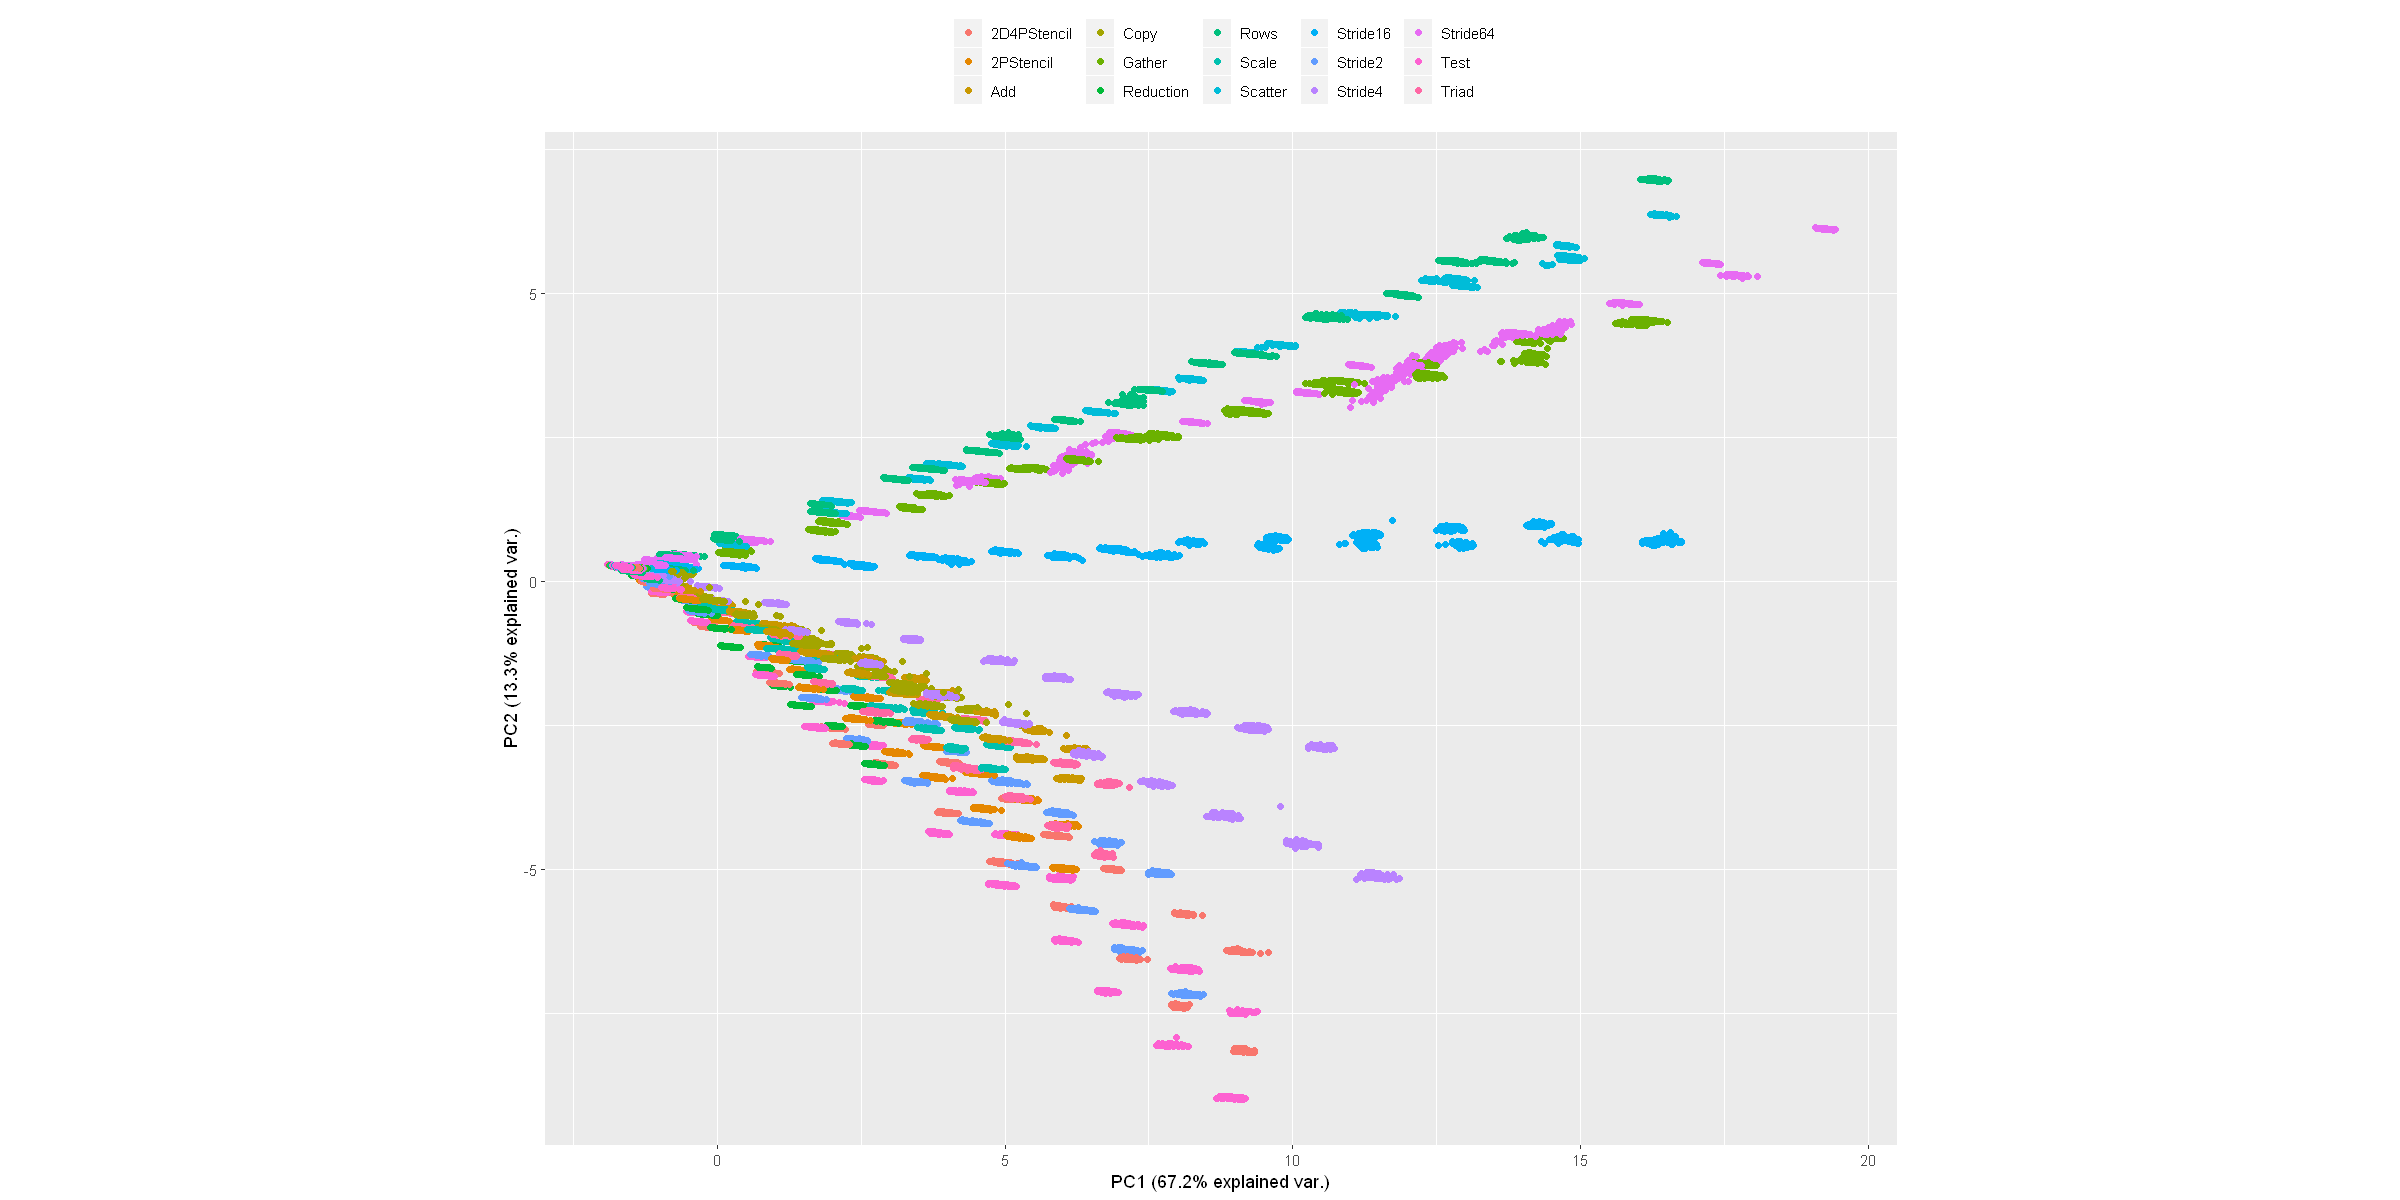

In [36]:
library(devtools)
library(ggbiplot)
g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = res.label, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
#g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = {res.label, res.threads}, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', legend.position = 'top')
print(g)

In [37]:
# Helper function : 
# Correlation between variables and principal components
var_cor_func <- function(var.loadings, comp.sdev){
  var.loadings*comp.sdev
  }

# Variable correlation/coordinates
loadings <- res.pca$rotation
sdev <- res.pca$sdev

var.coord <- var.cor <- t(apply(loadings, 1, var_cor_func, sdev))
print(var.coord[, 1:4])

                   PC1         PC2          PC3          PC4
PAPI_L1_DCM  0.9314405  0.25690043 -0.199789064  0.030918428
PAPI_L3_TCM  0.8675621  0.28479310 -0.064139662  0.068235160
PAPI_TOT_INS 0.8794919 -0.44618893 -0.009318838  0.044575748
PAPI_REF_CYC 0.9150433  0.23540015 -0.098135892  0.008071836
PAPI_L2_LDM  0.8348952  0.35118939 -0.078316829  0.167328597
PAPI_SR_INS  0.9159133 -0.28512144  0.078490480  0.020862289
PAPI_BR_UCN  0.6694686 -0.02952666  0.057526155 -0.707821447
PAPI_BR_CN   0.9145270 -0.29156071  0.123008391 -0.005120639
PAPI_BR_TKN  0.9141947 -0.29167033  0.123490732 -0.003786844
PAPI_BR_MSP  0.8931654  0.20782106  0.211763512  0.025247744
PAPI_FP_OPS  0.6714134 -0.59513513 -0.293702828  0.070993932
PAPI_L1_LDM  0.8823717  0.23924643 -0.084880641  0.161319264
PAPI_L1_STM  0.8357230  0.36806615 -0.240469001 -0.074466066
PAPI_LD_INS  0.7842681 -0.42359281  0.275515036  0.083845549
PAPI_L2_STM  0.7918365  0.43789393 -0.241326968 -0.079846518
PAPI_TLB_DM  0.5149026  

In [38]:
var.cos2 <- var.coord^2
print(var.cos2)

                   PC1          PC2          PC3          PC4          PC5
PAPI_L1_DCM  0.8675815 0.0659978289 3.991567e-02 9.559492e-04 0.0012372557
PAPI_L3_TCM  0.7526640 0.0811071118 4.113896e-03 4.656037e-03 0.0116432290
PAPI_TOT_INS 0.7735059 0.1990845637 8.684074e-05 1.986997e-03 0.0085274370
PAPI_REF_CYC 0.8373042 0.0554132325 9.630653e-03 6.515454e-05 0.0098331082
PAPI_L2_LDM  0.6970500 0.1233339849 6.133526e-03 2.799886e-02 0.0006865383
PAPI_SR_INS  0.8388971 0.0812942363 6.160755e-03 4.352351e-04 0.0194624955
PAPI_BR_UCN  0.4481881 0.0008718235 3.309258e-03 5.010112e-01 0.0048009175
PAPI_BR_CN   0.8363597 0.0850076476 1.513106e-02 2.622095e-05 0.0276471693
PAPI_BR_TKN  0.8357520 0.0850715791 1.524996e-02 1.434019e-05 0.0279779176
PAPI_BR_MSP  0.7977444 0.0431895936 4.484379e-02 6.374486e-04 0.0230640105
PAPI_FP_OPS  0.4507959 0.3541858239 8.626135e-02 5.040138e-03 0.0045485854
PAPI_L1_LDM  0.7785799 0.0572388536 7.204723e-03 2.602390e-02 0.0080857312
PAPI_L1_STM  0.6984329 0.

In [39]:
comp.cos2 <- apply(var.cos2, 2, sum)

contrib <- function(var.cos2, comp.cos2){var.cos2*100/comp.cos2}

var.contrib <- t(apply(var.cos2,1, contrib, comp.cos2))
print(var.contrib)

                  PC1         PC2          PC3          PC4        PC5
PAPI_L1_DCM  7.595453  2.91407852  4.360413229  0.161846444  0.2390231
PAPI_L3_TCM  6.589380  3.58121617  0.449404648  0.788287786  2.2493336
PAPI_TOT_INS 6.771845  8.79041115  0.009486538  0.336407479  1.6473996
PAPI_REF_CYC 7.330383  2.44672459  1.052058708  0.011030953  1.8996397
PAPI_L2_LDM  6.102493  5.44570817  0.670030258  4.740331371  0.1326310
PAPI_SR_INS  7.344328  3.58947850  0.673004851  0.073687237  3.7599230
PAPI_BR_UCN  3.923772  0.03849463  0.361505501 84.823424088  0.9274803
PAPI_BR_CN   7.322114  3.75344105  1.652927096  0.004439323  5.3411048
PAPI_BR_TKN  7.316794  3.75626389  1.665915442  0.002427858  5.4050015
PAPI_BR_MSP  6.984047  1.90700011  4.898763638  0.107922880  4.4556930
PAPI_FP_OPS  3.946602 15.63877659  9.423244943  0.853317835  0.8787327
PAPI_L1_LDM  6.816266  2.52733335  0.787048543  4.405962815  1.5620672
PAPI_L1_STM  6.114600  5.98168241  6.316876988  0.938826177  1.6649461
PAPI_L

In [40]:
print(sort(var.contrib[,'PC1'],decreasing=TRUE))

 PAPI_L1_DCM  PAPI_SR_INS PAPI_REF_CYC   PAPI_BR_CN  PAPI_BR_TKN  PAPI_BR_MSP 
    7.595453     7.344328     7.330383     7.322114     7.316794     6.984047 
 PAPI_L1_LDM PAPI_TOT_INS  PAPI_L3_TCM  PAPI_L1_STM  PAPI_L2_LDM  PAPI_L2_STM 
    6.816266     6.771845     6.589380     6.114600     6.102493     5.489268 
 PAPI_LD_INS  PAPI_FP_OPS  PAPI_BR_UCN  PAPI_L2_DCH  PAPI_TLB_DM 
    5.384836     3.946602     3.923772     2.646720     2.321098 


In [41]:
print(sort(var.contrib[,'PC2'],decreasing=TRUE))

 PAPI_FP_OPS  PAPI_L2_DCH PAPI_TOT_INS  PAPI_L2_STM  PAPI_LD_INS  PAPI_TLB_DM 
 15.63877659  15.39504802   8.79041115   8.46660816   7.92261877   7.84511592 
 PAPI_L1_STM  PAPI_L2_LDM  PAPI_BR_TKN   PAPI_BR_CN  PAPI_SR_INS  PAPI_L3_TCM 
  5.98168241   5.44570817   3.75626389   3.75344105   3.58947850   3.58121617 
 PAPI_L1_DCM  PAPI_L1_LDM PAPI_REF_CYC  PAPI_BR_MSP  PAPI_BR_UCN 
  2.91407852   2.52733335   2.44672459   1.90700011   0.03849463 


In [42]:
print(sort(var.contrib[,'PC3'],decreasing=TRUE))

 PAPI_TLB_DM  PAPI_FP_OPS  PAPI_LD_INS  PAPI_L2_STM  PAPI_L1_STM  PAPI_BR_MSP 
52.712288619  9.423244943  8.292296687  6.362033290  6.316876988  4.898763638 
 PAPI_L1_DCM  PAPI_BR_TKN   PAPI_BR_CN PAPI_REF_CYC  PAPI_L1_LDM  PAPI_SR_INS 
 4.360413229  1.665915442  1.652927096  1.052058708  0.787048543  0.673004851 
 PAPI_L2_LDM  PAPI_L3_TCM  PAPI_BR_UCN  PAPI_L2_DCH PAPI_TOT_INS 
 0.670030258  0.449404648  0.361505501  0.312701023  0.009486538 


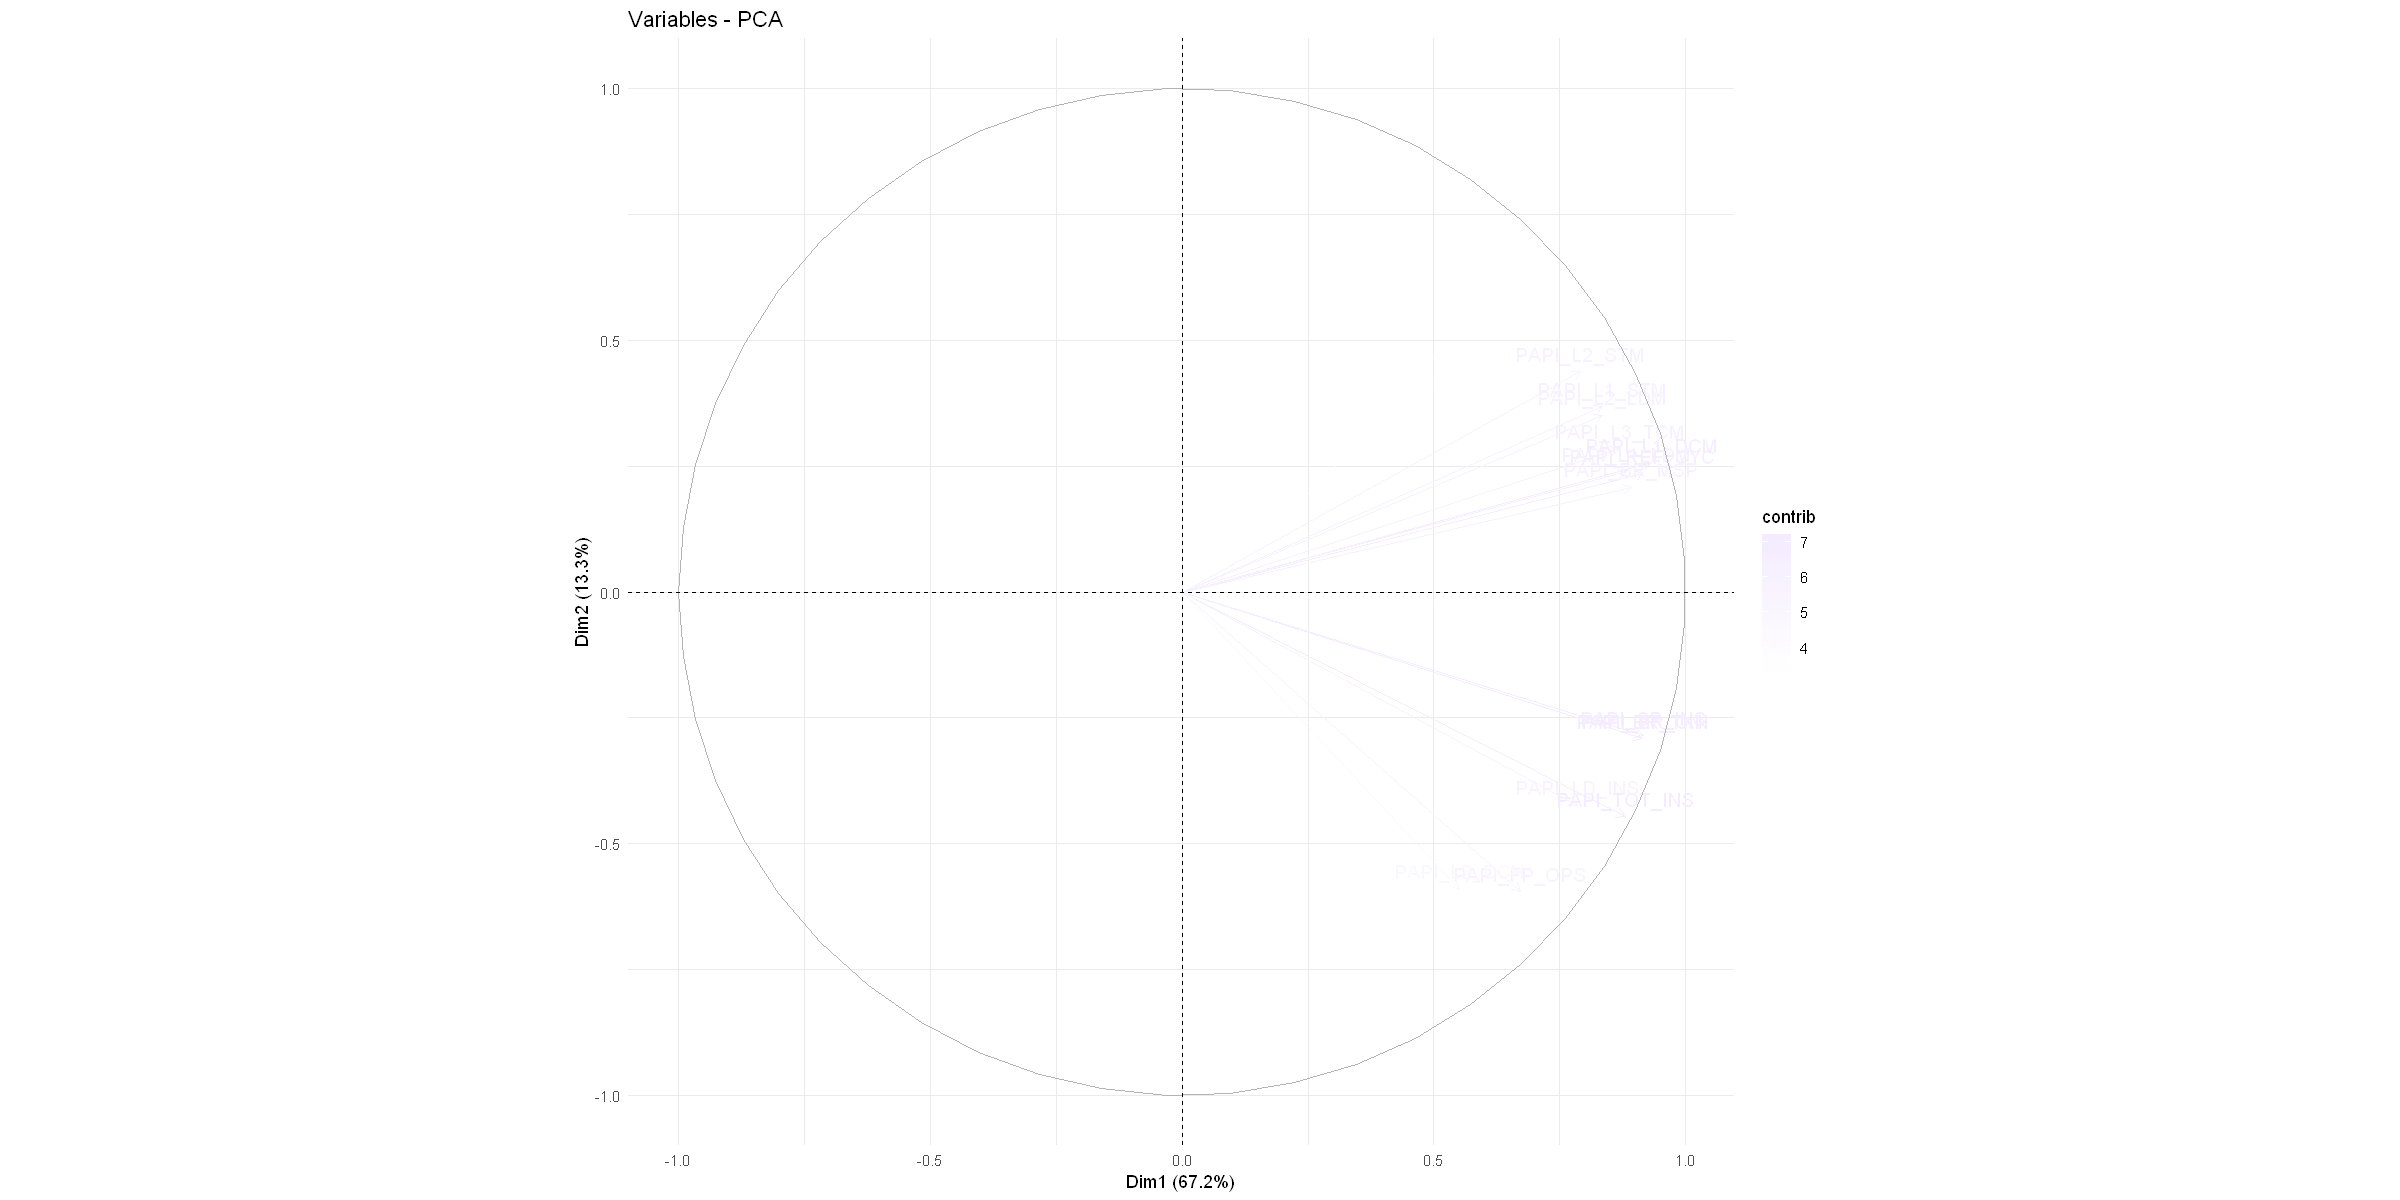

In [43]:
fviz_pca_var(res.pca, col.var="contrib") + scale_color_gradient2(low="white", mid="blue", high="red", midpoint=50) + theme_minimal()

In [44]:
new_mydata1 = mydata[,5:61]
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TOT_CYC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_DM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_FP_INS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_INS))

new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_IM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_RES_STL))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_PRC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_MSP))




new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_DP))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_SP))

my_data_ordered1 <- new_mydata1[,order(colnames(new_mydata1))]


options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 100)
res1 <- cor(my_data_ordered1)
dim(res1)
round(res1, 2)

ERROR: Error in `[.data.frame`(mydata, , 5:61): undefined columns selected


In [ ]:
library(corrplot)


corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "AOE", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=2)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=3)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=4)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=6)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=7)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=8)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=9)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=10)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=11)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=12)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=13)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=14)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=15)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=16)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=17)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "FPC", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "alphabet", number.cex = 0.5)